In [193]:
import math
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [194]:
class ImageOperation:
    def __init__(self,image_file):
        # read image to array
        self.image = Image.open(image_file)
#         image.show()
        
        self.modified_image = Image.open(image_file)
        
        # convert image into greyscale
        self.image_grey = self.image.convert("L")
#         img.show()
        
        self.dimension = self.image_grey.size
#         print(self.dimension)
        #Question 1:
    def size_dimen_noise_depth(self):
        image_values = np.array(self.image)
        image_dimension = np.array(self.dimension)
        plt.imshow(image_values, cmap='gray', vmin=0, vmax=255)
        plt.show()
        print("")
        h,w=image_values.shape
        depth=image_values.dtype
        print("size =","width:",w,"height: ",h)
        print("dimension",image_dimension)
        print("depth =",depth)
    
    
    
    #Question 2
    def entropy(self):
        
        image_values = np.array(self.image_grey)
        #print(image_values.shape)
        
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
        
        #plot histogram
        x = []
        y = []
        p = []
        sum_log_prob_value = 0
        for i in range(len(image_values)):
            count = 0
            for j in range(len(image_values)):
                if image_values[i] in x:
                    break
                if image_values[i] == image_values[j]:
                    count += 1
            if image_values[i] not in x:
                x.append(image_values[i])
                prob_value = count / (self.dimension[0]*self.dimension[1])
                log_prob_value = math.log(prob_value, 2)
                sum_log_prob_value += (prob_value * log_prob_value)
                p.append(prob_value)
                y.append(count)
        if histogram == True:
            self.imageHistogram(x,y)
        return sum_log_prob_value

     #question 3 
    def verticalFlip(self):
        
        image_values = np.array(self.image_grey)
        
        if self.dimension[0] % 2 == 0:
            x = (self.dimension[1] / 2)
            count = 0
        else:
            x = (self.dimesion[1] // 2)
            count = 1
        x = self.round_int(x)
        for i in reversed(range(x)):
            for j in range(self.dimension[0]):
                temp = image_values[i][j]
                image_values[i][j] = image_values[x+count][j] 
                image_values[x+count][j] = temp
            count += 1
            
        img = Image.fromarray(image_values, 'L')
        img.show()
    def round_int(self,x):
        if x == float("inf") or x == float("-inf"):
            return 0 # or x or return whatever makes sense
        return int(round(x))
    
    
    #Question no: 5
    def negativeImage(self, histogram=False):
        image_values = np.array(self.image_grey)
        #print(image_values.shape)
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
        for i in range(len(image_values)):
            image_values[i] = 255 - image_values[i]
                        
        #plot histogram
        x = []
        y = []
        if histogram == True:
            for i in range(len(image_values)):
                count = 0
                for j in range(len(image_values)):
                    if image_values[i] in x:
                        break
                    if image_values[i] == image_values[j]:
                        count += 1
                if image_values[i] not in x:
                    x.append(image_values[i])
                    y.append(count)
            self.imageHistogram(x,y)
        
        # Creates PIL image
        image_values = image_values.reshape(self.dimension[1], self.dimension[0])
        img = Image.fromarray(image_values, 'L')
        img.show()
        self.modified_image = img
        
        
         #Question no:6
    def bitPlane(self, bit_number=0):
        if bit_number >= 8:
            print("Bit Plane number is wrong")
            return None 
        image_values = np.array(self.image_grey)
        bit_image_values = []
        #print(image_values.shape)
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])

        
        for i in range(len(image_values)):
            bit_image_values.append(np.binary_repr(image_values[i], width=8))
#             print(bit_image_values[i])
        final_image_values = np.array(image_values)
        
        for j in range(bit_number+1):
            bit_list = [  int(i[j] )    for i in bit_image_values]
            temp_values = np.array( bit_list ) * (2^(7-j))
            for i in range(len(temp_values)):
                final_image_values[i] += temp_values[i]
        
        image_values = final_image_values.reshape(self.dimension[1], self.dimension[0])
        # Creates PIL image
        img = Image.fromarray(image_values, 'L')
        img.show()
        self.modified_image = img
        
     #Question no: 7
        
    def brightness(self):
        image_values = np.array(self.image_grey)
        #print(image_values.shape)
        image_values_sum = 0
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
        for i in range(len(image_values)):
            image_values_sum += image_values[i]
        
        return image_values_sum / (self.dimension[0] *self.dimension[1])
    
    
   
    def contrastValue(self):
        brightness = self.brightness()
        image_values = np.array(self.image_grey)
        #print(image_values.shape)
        image_values_sum_squares = 0
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
        for i in range(len(image_values)):
            image_values_sum_squares += (brightness  - image_values[i]) ** 2
        final_result = ((image_values_sum_squares/ (self.dimension[0]*self.dimension[1])) ** 0.5)
        return final_result
    
     #Question no: 10
    def powerLawImage(self, gamma, c=1, histogram=False):
        image_values = np.array(self.image_grey)
        if c == 1:
            c = 255 / (np.log(1 + np.max(image_values)))
        
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
        
        for i in range(len(image_values)):
            image_values[i] = c * (image_values[i] ** gamma)
        
        #plot histogram
        x = []
        y = []
        if histogram == True:
            for i in range(len(image_values)):
                count = 0
                for j in range(len(image_values)):
                    if image_values[i] in x:
                        break
                    if image_values[i] == image_values[j]:
                        count += 1
                if image_values[i] not in x:
                    x.append(image_values[i])
                    y.append(count)
            self.imageHistogram(x,y)
        
        image_values = image_values.reshape(self.dimension[1], self.dimension[0])
        # Creates PIL image
        img = Image.fromarray(image_values, 'L')
        img.show()
        self.modified_image = img
        
    
    
    #Question no: 11
    def contrastStretchingImage(self, a, b, c, d, histogram=False):
        image_values = np.array(self.image_grey)
        #print(image_values.shape)
        
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
        for i in range(len(image_values)):
            image_values[i] = ((image_values[i]-c) * ( (b - a)/ (d-c)))+a
        
        #plot histogram
        x = []
        y = []
        if histogram == True:
            for i in range(len(image_values)):
                count = 0
                for j in range(len(image_values)):
                    if image_values[i] in x:
                        break
                    if image_values[i] == image_values[j]:
                        count += 1
                if image_values[i] not in x:
                    x.append(image_values[i])
                    y.append(count)
            self.imageHistogram(x,y)
        
        image_values = image_values.reshape(self.dimension[1], self.dimension[0])
        # Creates PIL image
        img = Image.fromarray(image_values, 'L')
        img.show()
        self.modified_image = img
    def imageHistogram(self, x, y):

#         plt.plot(x, y)

#         plt.scatter(x, y, label="stars", color="green",
#             marker="1", s=30)
        plt.bar(x, y, 
            width=0.25, color=['red', 'green'])
        plt.xlabel('Pixel Value')
        plt.ylabel('Number of Occurance')

        plt.title('Bar chart')

        plt.show()
        
     #Question 12   
    def saveImage(self, name):
        self.modified_image.save(name+".jpg")
    

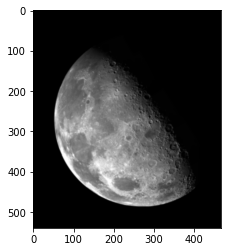


size = width: 466 height:  540
dimension [466 540]
depth = uint8


In [195]:
image = "./pictures/Fig0338(a)(blurry_moon).tif"
instance = ImageOperation(image)
instance.size_dimen_noise_depth()


In [175]:
instance.entropy()

In [196]:
instance.verticalFlip()

In [197]:
instance.negativeImage()

In [198]:
instance.bitPlane(7)

In [199]:
instance.contrastValue()

64.4783018371558

In [200]:
instance.powerLawImage(1.02,1)

In [201]:
instance.contrastStretchingImage(1,2,3,4)